<a href="https://colab.research.google.com/github/fhizal/Breast-Cancer/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem:** Kanser<br> 
**Yapılan iş:** Verilerin analiz edilmesi.<br>
**Sonuç:** Alanında uzman insanların otorup, aylarca yapılan çalışmalar sonunda kanser verilerinin özellikleri ve sonuç olarak kötü veya iyi huylu olup olmadığını belirlemişler. Şuan bu baktığımız verilerilere ait gerçek hastaların bir çoğu hayatta olmayabilir..

**İsteğimiz:** Bu verileri kullanarak yani, supervised ile yeni bir model oluşturularak, makine öğrenmesi ile 'data kullanarak insan hayatının kurtulmasına' yardımcı olmak.
---



In [ ]:
#Veriye dayalı meme kanserinin tespit edilmesi.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()


df=pd.DataFrame(np.c_[cancer['data'],cancer['target']], columns = np.append(cancer['feature_names'],['target']))
                                                                  #target, kolon isimlerinin içinde dahil edilmemiş. Ayrıca bir list olarak verilmiş. Bu yüzden
                                                                  #np append ile birleştiriyorum.
df.head(6)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0.0


In [ ]:
# Cancer bir sözlük. Keyleri ve verileri var.
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
# Satır ve sutun sayılarını gösterir
# Buradaki sonuç; 569 satır ve 31 adet sütun var demektir.
df.shape

(569, 31)

In [ ]:
# Sadece belirli satırlardaki değerleri okuyabilirim.
df.loc[7:30:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
7,13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0.0
12,19.17,24.80,132.4,1123.0,0.0974,0.2458,0.20650,0.11180,0.2397,0.07800,0.9555,3.5680,11.070,116.20,0.003139,0.08297,0.08890,0.04090,0.04484,0.012840,20.96,29.94,151.7,1332.0,0.1037,0.3903,0.3639,0.1767,0.3176,0.10230,0.0
17,16.13,20.68,108.1,798.8,0.1170,0.2022,0.17220,0.10280,0.2164,0.07356,0.5692,1.0730,3.854,54.18,0.007026,0.02501,0.03188,0.01297,0.01689,0.004142,20.96,31.48,136.8,1315.0,0.1789,0.4233,0.4784,0.2073,0.3706,0.11420,0.0
22,15.34,14.26,102.5,704.4,0.1073,0.2135,0.20770,0.09756,0.2521,0.07032,0.4388,0.7096,3.384,44.91,0.006789,0.05328,0.06446,0.02252,0.03672,0.004394,18.07,19.08,125.1,980.9,0.1390,0.5954,0.6305,0.2393,0.4667,0.09946,0.0
27,18.61,20.25,122.1,1094.0,0.0944,0.1066,0.14900,0.07731,0.1697,0.05699,0.8529,1.8490,5.632,93.54,0.010750,0.02722,0.05081,0.01911,0.02293,0.004217,21.31,27.26,139.9,1403.0,0.1338,0.2117,0.3446,0.1490,0.2341,0.07421,0.0


In [ ]:
# Amacımız, elimizdeki veriler ne kadar dolu, bunu görmek istiyorum. 
# Bu yüzden boş olan hücrelerin toplamını görmek istiyorum. Sonradan farkediyorum ki. df.DESCR icinde verilmis
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [ ]:
# iyi huylu ve kotu kuylu olanlarin toplamlari
# 1: kötü huylu, 0: iyi huylu
df['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

In [ ]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


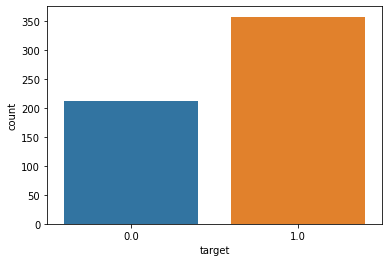

In [ ]:
sns.countplot(df['target'],label="count")

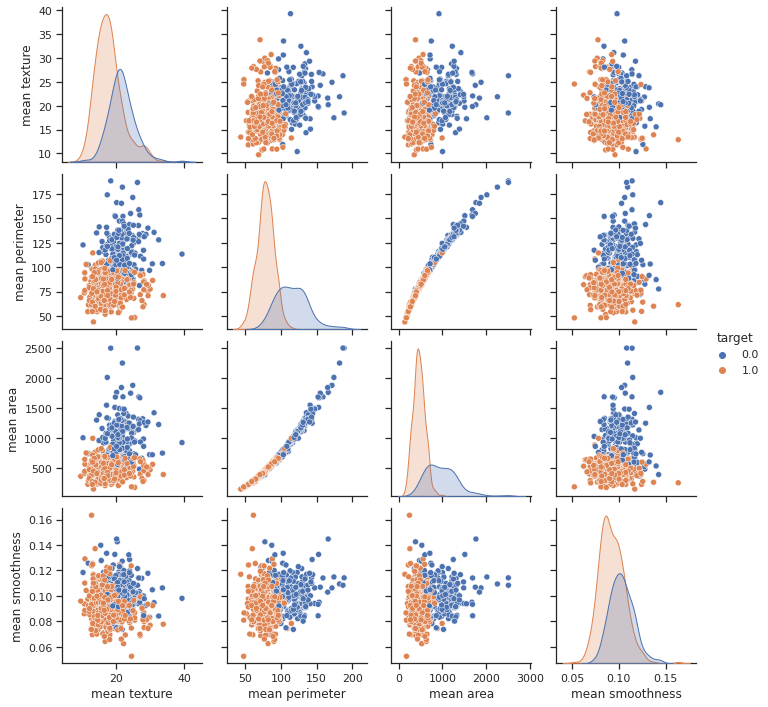

In [ ]:
# sns seaborn ile tüm hastaları görselleştirdim. Hiçbir filtre yok. Sadece grafiksel olarak gösteriyorum.
# hue parametresini kullanarak, kanserli olup olmamasi durumna göre renklendiriyorum.
# vars ile dataframdeki kolonların index sayisina karsilik gelen kolonlara gore grafik olusuruyorum.
sns.pairplot(df, hue='target', vars= df.columns[1:5])

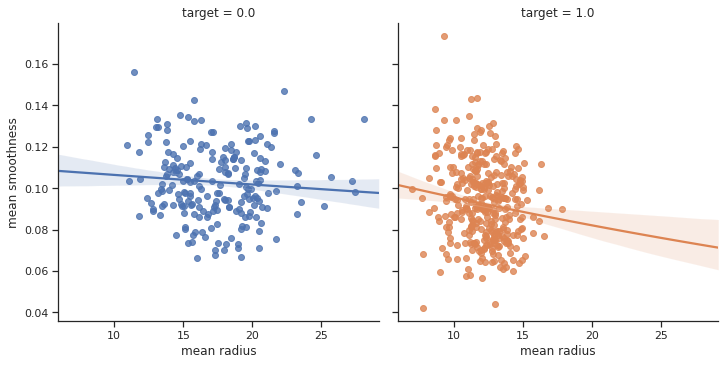

In [ ]:
#sns.pairplot(df, hue='target', vars= df.columns[0:5])

g = sns.lmplot(x="mean radius", y="mean smoothness", col="target", hue="target", data=df,y_jitter=.02, logistic=True, truncate=False)

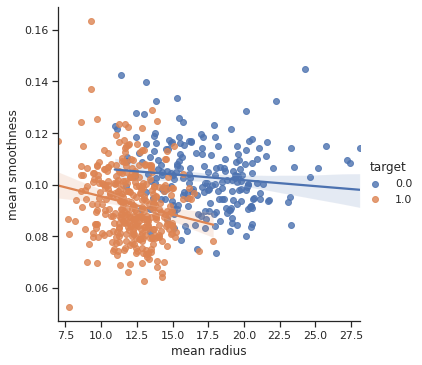

In [ ]:
#sns.pairplot(df, hue='target', vars= df.columns[0:5])
g = sns.lmplot(
    data=df,
    x="mean radius", y="mean smoothness", hue="target",
    height=5
)

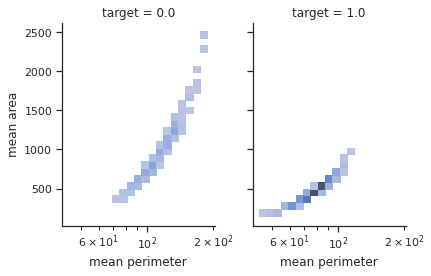

In [ ]:
sns.displot(
    data=df, x="mean perimeter", y="mean area", col="target",
    log_scale=(True, False), col_wrap=4, height=4, aspect=.7,
)

In [ ]:
df.iloc[2:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
2,19.69,21.25,130.00,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


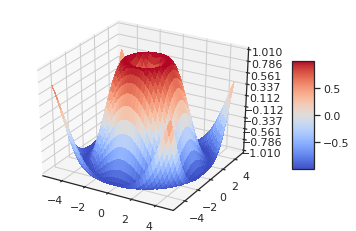

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)

X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)

Z = np.sin(R)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
#Veriler arasındaki korelasyonu gösteriyorum. Korelasyon, birbirlerini etkileme miktarları olarak anlatılabilir.
df.iloc[:,1:12].corr()

,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error
mean texture,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358
mean perimeter,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761
mean area,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280
mean smoothness,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406
mean compactness,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205
mean concavity,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218
mean concave points,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480
mean symmetry,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053
mean fractal dimension,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174
radius error,0.275869,0.691765,0.732562,0.301467,0.497473,0.631925,0.698050,0.303379,0.000111,1.000000,0.213247


Ancak, bazen sadece veriyi göstermek yeterli olmayabiliyor. Bunu grafik üzerinde göstermek, anlamayı ve büyük resmi görmeyi kolaylaştırıyor.

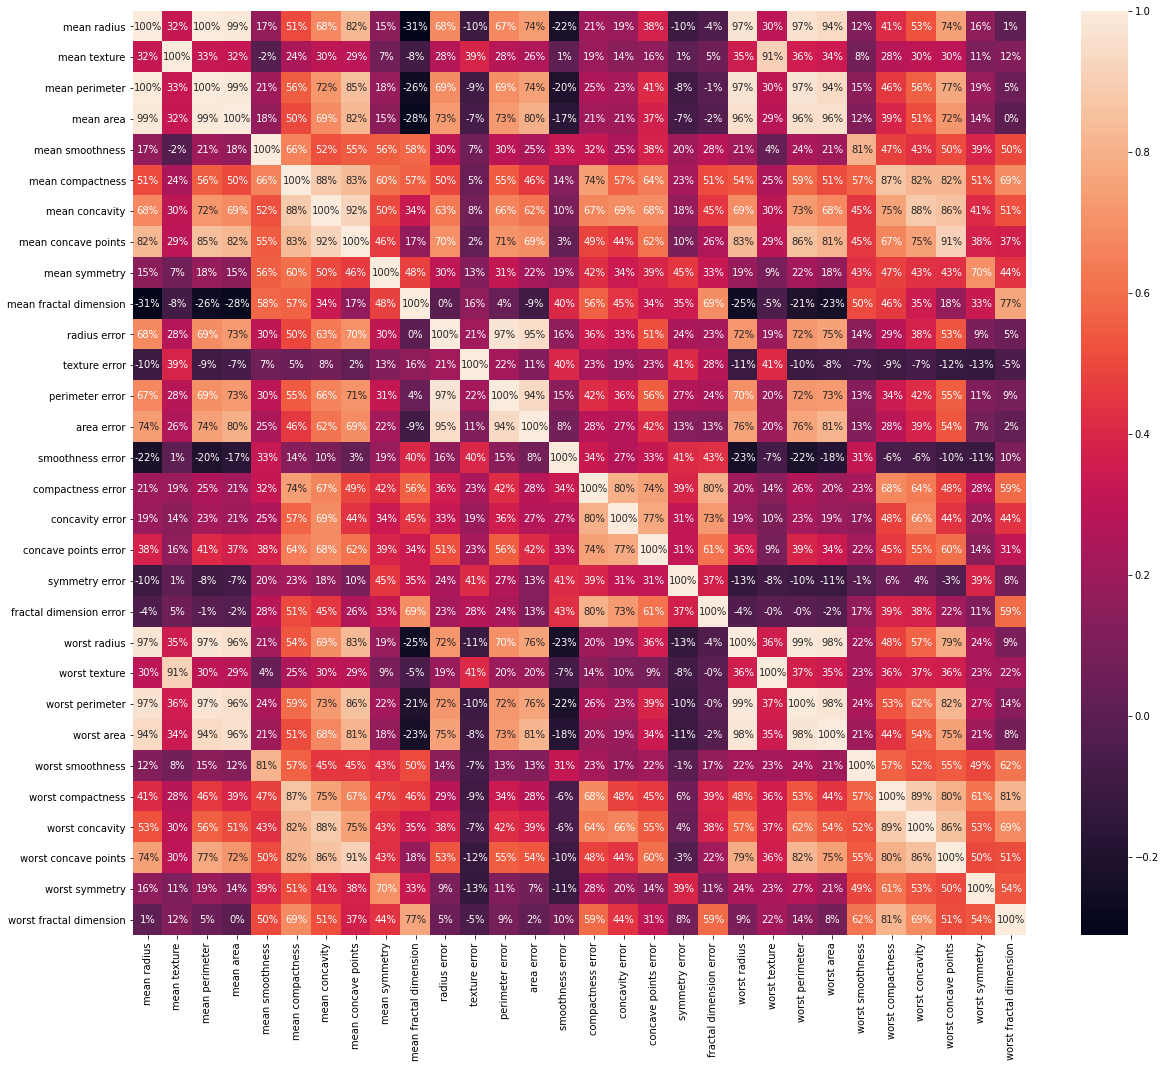

In [ ]:
#Pilotlib kullanarak, görselimin büyüklüğünü ayarlıyorum.
plt.figure(figsize=(20,17))
#seaborn kullanarak görselleştiriyorum.
sns.heatmap(df.iloc[:,0:30].corr(), annot=True, fmt='.0%')